### Bike sharing demand

#### 0. Data Fields
1. datetime - hourly date + timestamp 
2. season -  1 = spring, 2 = summer, 3 = fall, 4 = winter (cat) 
3. holiday - whether the day is considered a holiday
4. workingday - whether the day is neither a weekend nor holiday (cat)
5. weather - (cat) <br>
    1: Clear, Few clouds, Partly cloudy, Partly cloudy <br>
    2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist <br>
    3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds <br>
    4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog <br>
6. temp - temperature in Celsius
7. atemp - "feels like" temperature in Celsius
8. humidity - relative humidity
9. windspeed - wind speed
10. casual - number of non-registered user rentals initiated
11. registered - number of registered user rentals initiated
12. count - number of total rentals


#### 1. Data import & check

In [158]:
import pandas as pd
import numpy as np
import matplotlib as mlp
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from scipy import stats

mlp.rcParams['axes.unicode_minus'] = False

import os
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')

In [159]:
os.listdir('./data')

['sampleSubmission.csv', 'test.csv', 'train.csv']

In [160]:
submission = pd.read_csv("./data/sampleSubmission.csv")
train= pd.read_csv('./data/train.csv')
test= pd.read_csv('./data/test.csv')

In [161]:
submission.columns

Index(['datetime', 'count'], dtype='object')

In [162]:
display(train.head())
display(test.head())

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [163]:
train.shape,test.shape

((10886, 12), (6493, 9))

In [165]:
# 정보 확인
print(train.info())
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6

In [171]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [166]:
# datetime 변경
train['datetime']=pd.to_datetime(train['datetime'])
test['datetime']=pd.to_datetime(test['datetime'])

Skewness(비대칭도)란 분포가 얼마나 비대칭을 띄는가 알려주는 척도입니다.

(비대칭도: a=0이면 정규분포, a<0 이면 오른쪽으로 치우침, a>0이면 왼쪽으로 치우침)


Kurtosis (첨도)란 확률분포의 뾰족한 정도를 나타내는 척도입니다.

관측치들이 어느 정도 집중적으로 중심에 몰려 있는가를 측정할 때 사용됩니다.

Skewness: 1.242066
Kurtosis: 1.300093


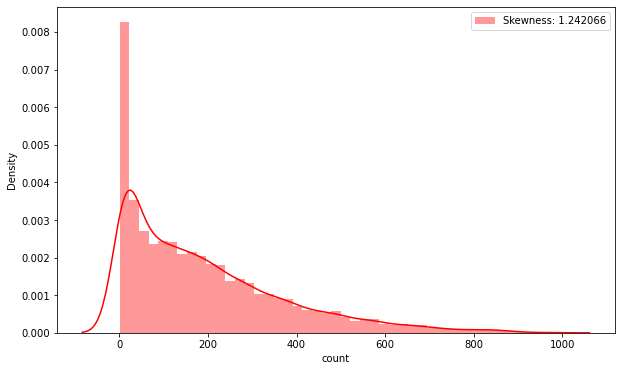

In [169]:
# 왜도 첨도 확인

f, ax = plt.subplots(1,1, figsize=(10,6))
g= sns.distplot(train['count'],color='r',label="Skewness: {:2f}".format(train["count"].skew()),ax=ax)
g=g.legend(loc="best")

print("Skewness: %f" % train["count"].skew()) 
print("Kurtosis: %f" % train["count"].kurt())

#### 2. EDA

In [186]:
train['year']=train['datetime'].dt.year
train['month']=train['datetime'].dt.month
train['day']=train['datetime'].dt.day
train['hour']=train['datetime'].dt.hour
train['minute']=train['datetime'].dt.minute
train['second']=train['datetime'].dt.second

test['year']=test['datetime'].dt.year
test['month']=test['datetime'].dt.month
test['day']=test['datetime'].dt.day
test['hour']=test['datetime'].dt.hour
test['minute']=test['datetime'].dt.minute
test['second']=test['datetime'].dt.second

train.shape

(10886, 18)

[Text(0, 0.5, 'count'), Text(0.5, 1.0, 'day')]

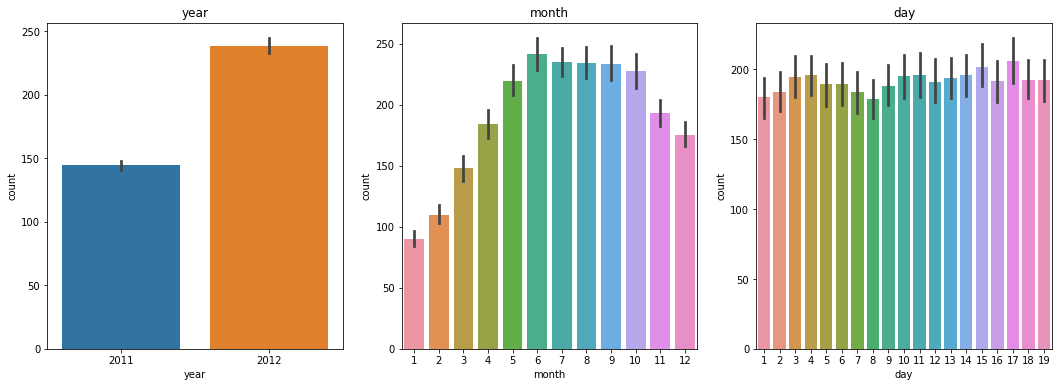

In [187]:
# 1. year , month, day 
figure,(ax1,ax2,ax3) = plt.subplots(nrows=1 , ncols=3)
figure.set_size_inches(18,6)

sns.barplot(data=train,x='year',y='count',ax=ax1)
sns.barplot(data=train,x='month',y='count',ax=ax2)
sns.barplot(data=train,x='day',y='count', ax=ax3)

ax1.set(ylabel='count',title='year')
ax2.set(ylabel='count',title='month')
ax3.set(ylabel='count',title='day')

In [81]:
# year : 12년도에 대여량이 늘어남 > 변수 O
# month : 월별 대여량을 봤을 때 겨울보다 여름에 더 많이 대여함 > 변수 O
# day : 1-19일밖에 없기때문에 > 일단 보류

[Text(0, 0.5, 'count'), Text(0.5, 1.0, 'second')]

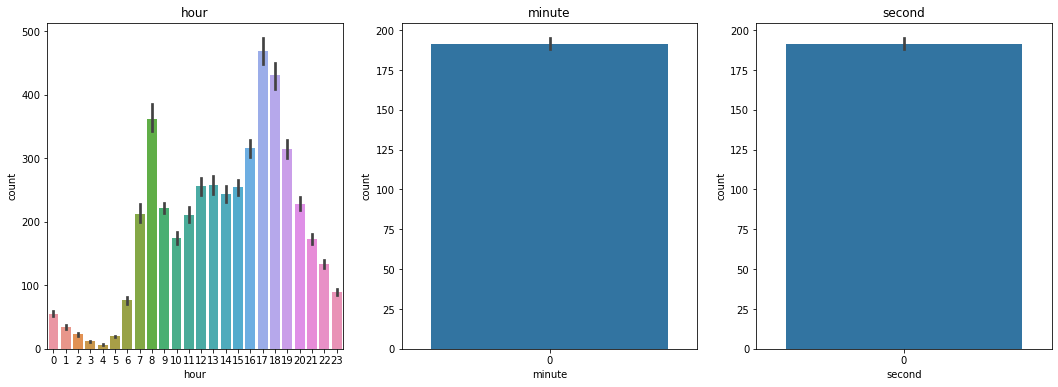

In [188]:
# 2. hour, minuate, second
figure,(ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3)
figure.set_size_inches(18,6)
sns.barplot(data=train,x='hour',y='count',ax=ax1)
sns.barplot(data=train,x='minute',y='count',ax=ax2)
sns.barplot(data=train,x='second',y='count',ax=ax3)

ax1.set(ylabel='count',title='hour')
ax2.set(ylabel='count',title='minute')
ax3.set(ylabel='count',title='second')

In [ ]:
# hour: 오전 8, 오후 5시, 오후6시 -> 출퇴근시간 이용고객이 많기 때문이라고 판단 > 변수 O
# minute,second : 변수 x

In [189]:
train['dayofweek']=train['datetime'].dt.dayofweek
test['dayofweek']=test['datetime'].dt.dayofweek
train.shape

(10886, 19)

In [190]:
from collections import Counter
Counter(train['dayofweek'])

Counter({5: 1584, 6: 1579, 0: 1551, 1: 1539, 2: 1551, 3: 1553, 4: 1529})

<AxesSubplot:xlabel='hour', ylabel='count'>

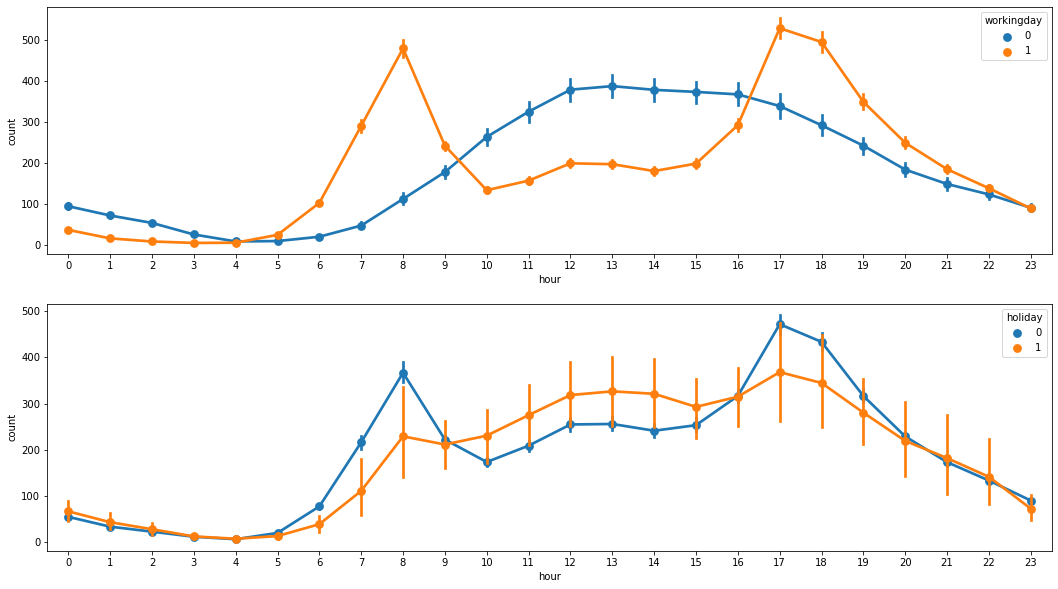

In [191]:
figure,(ax1,ax2) = plt.subplots(nrows=2)
figure.set_size_inches(18,10)

sns.pointplot(data=train,x='hour',y='count',hue='workingday',ax=ax1)
sns.pointplot(data=train,x='hour',y='count', hue = 'holiday',ax=ax2)

<AxesSubplot:xlabel='hour', ylabel='count'>

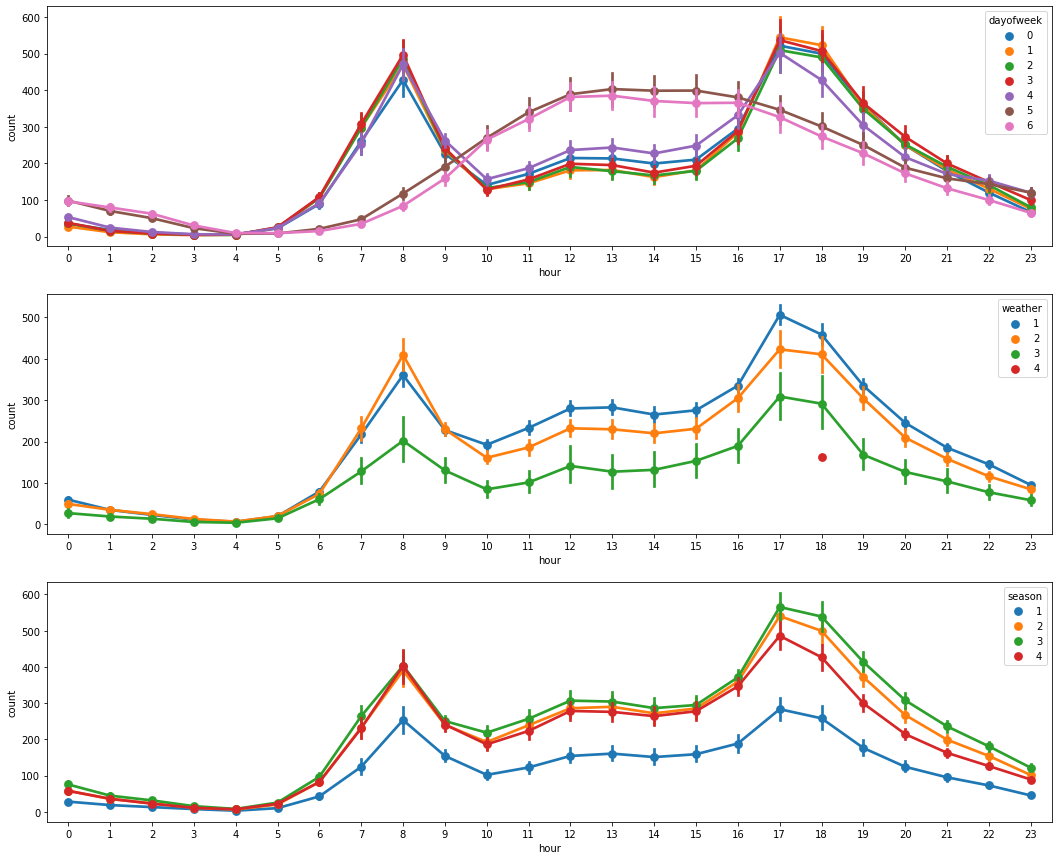

In [192]:
figure,(ax3,ax4,ax5) = plt.subplots(nrows=3)
figure.set_size_inches(18,15)


sns.pointplot(data=train,x='hour',y='count', hue = 'dayofweek',ax=ax3)
sns.pointplot(data=train,x='hour',y='count', hue = 'weather',ax=ax4)
sns.pointplot(data=train,x='hour',y='count',hue='season',ax=ax5)

In [193]:
# workingday : 근무일에는 출근시간,퇴근시간에 수요량이 급증하고 아닐땐 오후에 수요량 증가 > 변수 O
# holiday : 휴일이 아닐때는 workingda일때랑 비슷,휴일일때는 평이하지만 오후가 많음
# dayofweek : 토일(5,6)과 주중이 패턴이 다르다
# weather : 악천후에는 거의없고 날씨가 좋아질수록 대여가 많은 것으로 보임
# season : 봄에 가장 작고 가을 여름 겨울 순으로 많음 >> 겨울이 많은 이유가 10월때문인듯함

In [194]:
'''season=[]
for month in train['month']:
    if month in (12,1,2):
        season.append(4)
    if month in (3,4,5):
        season.append(1)
    if month in (6,7,8):
        season.append(2)
    if month in (9,10,11):
        season.append(3)
        
train['season2']=season'''

"season=[]\nfor month in train['month']:\n    if month in (12,1,2):\n        season.append(4)\n    if month in (3,4,5):\n        season.append(1)\n    if month in (6,7,8):\n        season.append(2)\n    if month in (9,10,11):\n        season.append(3)\n        \ntrain['season2']=season"

<AxesSubplot:xlabel='hour', ylabel='count'>

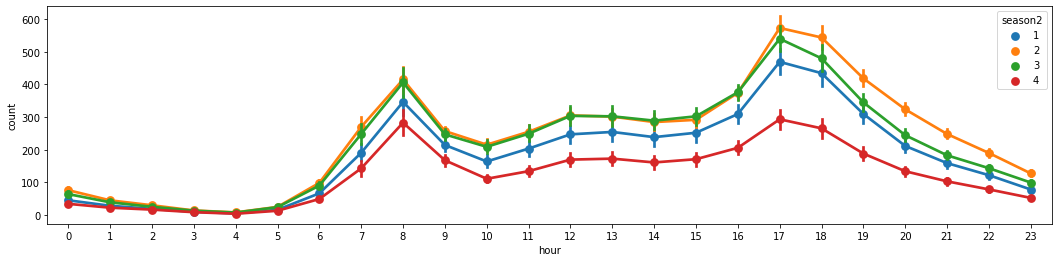

In [133]:
'''figure, ax1 = plt.subplots(1,1)
figure.set_size_inches(18,4)
sns.pointplot(data=train,x='hour',y='count',hue='season2',ax=ax1)'''

In [ ]:
# 상관관계 확인

<AxesSubplot:>

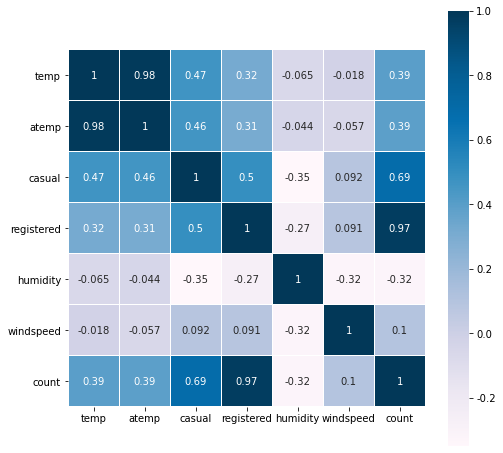

In [195]:
figure,ax1=plt.subplots(figsize=(8,8))

corr_data=train[['temp','atemp','casual','registered','humidity', 'windspeed','count']]
colormap=plt.cm.PuBu
sns.heatmap(corr_data.corr(),linewidths=0.1,square=True,annot=True,cmap=colormap)

In [196]:
# temp,atemp 다중공선성 의심
# registered가 상관관계높음, 그 다음은 casual >> 당연함,, count가 r+c임 (test엔 없는 변수) 

<AxesSubplot:xlabel='windspeed', ylabel='count'>

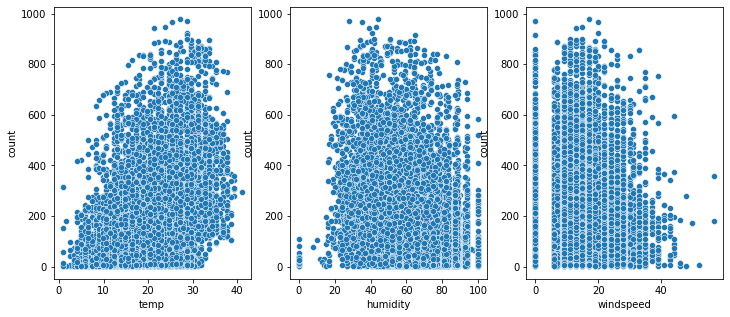

In [209]:
figure,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(12,5))
sns.scatterplot(train['temp'],train['count'],ax=ax1)
sns.scatterplot(train['humidity'],train['count'],ax=ax2)
sns.scatterplot(train['windspeed'],train['count'],ax=ax3)

In [ ]:
# 유의하지 않다 판단된거 scatter 그려봄
# windspeed 0이 많음 >> 풍속이 0인 경우 가 거의 없기때문에 null을 0으로 채운것일슈동^^

In [206]:
len(train[train['windspeed']==0]),len(test[test['windspeed']==0]) #1313/10886,867/6493 >> 0 너무 많음

(1313, 867)

#### 3. Feature engineering

In [ ]:
# 이상치 제거(IQR)

In [240]:
def get_outlier(df,features,n):
    outlier_indices=[]
    for col in features:
        q1=np.percentile(df[col].values,25)
        q3=np.percentile(df[col].values,75)

        IQR= q3-q1
        offset=IQR*1.5

        outlier_idx = df[col][(df[col]<q1-offset) | (df[col]>q3+offset)].index
        outlier_indices.extend(outlier_idx) 
    outlier_indices = Counter(outlier_indices) 
    multiple_outliers = list(k for k, v in outlier_indices.items() if v > n) 
    return multiple_outliers


In [251]:
drop = get_outlier(train, ["temp", "atemp", "casual", "registered", "humidity", "windspeed", "count"],2)

In [253]:
train=train.drop(drop,axis=0).reset_index()

In [254]:
train.shape

(10846, 19)

In [264]:
df=train[["temp", "atemp", "casual", "registered", "humidity", "windspeed", "count"]]
for col in df:
    print( 
        f"{col:15}    Skewness : {df[col].skew()}    Kurtosis : {df[col].kurt()} "
        
    )
    

temp               Skewness : 0.008677964271559936    Kurtosis : -0.9119795917903017 
atemp              Skewness : -0.09787308278730135    Kurtosis : -0.8487266736617243 
casual             Skewness : 2.5213676315910036    Kurtosis : 7.735384734443245 
registered         Skewness : 1.505435851389979    Kurtosis : 2.610777265566756 
humidity           Skewness : -0.0885248675462909    Kurtosis : -0.7566139417209068 
windspeed          Skewness : 0.5830946179943688    Kurtosis : 0.6278119762407259 
count              Skewness : 1.2109229742605938    Kurtosis : 1.2008710894377526 


skew : -0.9751984624600509
kurt : 0.2474354685935345


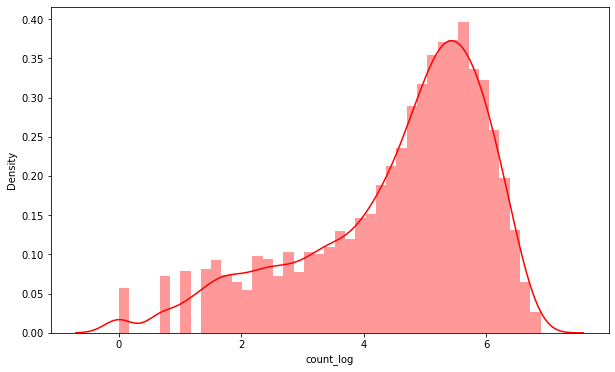

In [274]:
#  count 정규화
train['count_log'] = train['count'].map(lambda x:np.log(x) if x>0 else 0)

fig, ax1 = plt.subplots(1,1,figsize=(10,6))
g=sns.distplot(train['count_log'],color='r',ax=ax1)
col='count_log'
print( f'skew : {train[col].skew()}')
print(f'kurt : {train[col].kurt()}')

In [276]:
train.drop('count',axis=1,inplace=True)